- 차원이 안 맞는 오류 발생시
    1. tf.random.normal의 shape를 (1000, 1)로 스칼라가 아닌 벡터로 지정해주는 방법
    2. numpy_ops로 reshape를 텐서에 쓸 수 있게 한 다음, reshape(-1, 1) 지정하는 방법

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

x_train = tf.random.normal(shape=(1000, 1), dtype=tf.float32)
y_train = 3 * x_train + 1 + 0.2 * tf.random.normal(shape=(1000, 1), dtype=tf.float32)

x_test = tf.random.normal(shape=(300, 1), dtype=tf.float32)
y_test = 3 * x_test + 1 + 0.2 * tf.random.normal(shape=(300, 1), dtype=tf.float32)

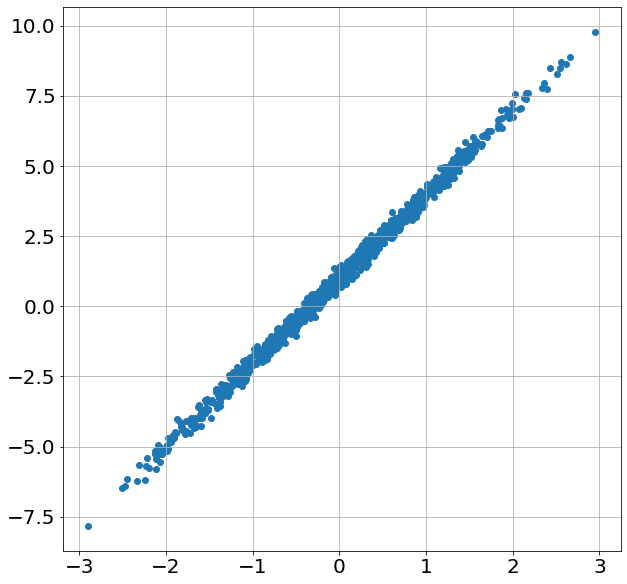

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_train.numpy(), y_train.numpy())
ax.tick_params(labelsize=20)
ax.grid()

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, activation='linear'),
    ])

model.compile(loss=tf.keras.losses.mean_squared_error, optimizer='SGD')

In [37]:
model.fit(x_train, y_train, epochs=50, verbose=1, batch_size=1)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0386
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0387
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0386
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0387
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0387
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0385
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0388
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0387
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0386
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0388
Epoch 11/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0386
Epoch 12/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0386
E

In [39]:
model.evaluate(x_test, y_test, verbose=2)

10/10 - 0s - loss: 0.0436 - 112ms/epoch - 11ms/step


0.043618373572826385

---

In [43]:
x_train = tf.random.normal(shape=(10, 1), dtype=tf.float32)
y_train = 3 * x_train + 1 + 0.2 * tf.random.normal(shape=(10, 1), dtype=tf.float32)

x_test = tf.random.normal(shape=(3, 1), dtype=tf.float32)
y_test = 3 * x_test + 1 + 0.2 * tf.random.normal(shape=(3, 1), dtype=tf.float32)

In [51]:
from termcolor import colored

class LinearPredictor(tf.keras.Model):
    def __init__(self):
        super(LinearPredictor, self).__init__()
        
        self.d1 = tf.keras.layers.Dense(units=1, activation='linear')
        
    def call(self, x):
        x = self.d1(x)
        return x

EPOCHS = 10
LR = 0.01
model = LinearPredictor()

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

for epoch in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, (1, 1))
        # 여기서부터가 하나의 이터레이션이 됨
        ## fore propagation
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
            
        ## back propagation
        gradients = tape.gradient(loss, model.trainable_variables)
        ## update parameter
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
    print(colored('Epoch: ', 'red', 'on_white'), epoch + 1)
    
    template = 'Train Loss: {:.4f}'
    print(template.format(loss))

Epoch:  1
Train Loss: 12.7925
Epoch:  2
Train Loss: 7.3635
Epoch:  3
Train Loss: 4.2185
Epoch:  4
Train Loss: 2.4009
Epoch:  5
Train Loss: 1.3539
Epoch:  6
Train Loss: 0.7537
Epoch:  7
Train Loss: 0.4120
Epoch:  8
Train Loss: 0.2194
Epoch:  9
Train Loss: 0.1124
Epoch:  10
Train Loss: 0.0542
